<a href="https://colab.research.google.com/github/yashsarda18/histopathological-image-classification/blob/main/Hist_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashsarda1818","key":"940cadbf23fad6df8610776f1d56f3b3"}'}

In [ ]:
!pip install -q kaggle # install kaggle api client

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d forderation/breakhis-400x

Dataset URL: https://www.kaggle.com/datasets/forderation/breakhis-400x
License(s): CC0-1.0
100% 803M/803M [00:39<00:00, 21.3MB/s]
100% 803M/803M [00:39<00:00, 21.1MB/s]


In [ ]:
!unzip -q breakhis-400x.zip

In [ ]:
!ls BreaKHis

test  train


In [ ]:
!ls BreaKHis/train

benign	malignant


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("BreaKHis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'BreaKHis'.
There are 2 directories and 0 images in 'BreaKHis/test'.
There are 0 directories and 369 images in 'BreaKHis/test/malignant'.
There are 0 directories and 176 images in 'BreaKHis/test/benign'.
There are 2 directories and 0 images in 'BreaKHis/train'.
There are 0 directories and 777 images in 'BreaKHis/train/malignant'.
There are 0 directories and 371 images in 'BreaKHis/train/benign'.


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (460, 700, 3)


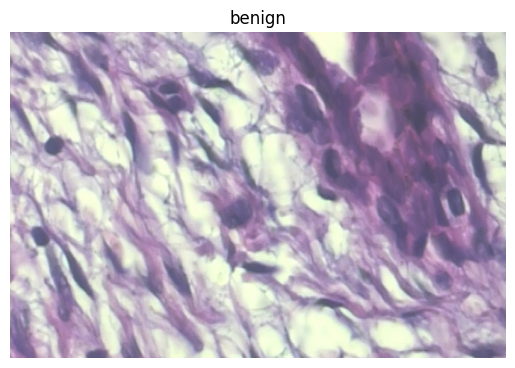

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="BreaKHis/train/",
                        target_class="benign")

Image shape: (460, 700, 3)


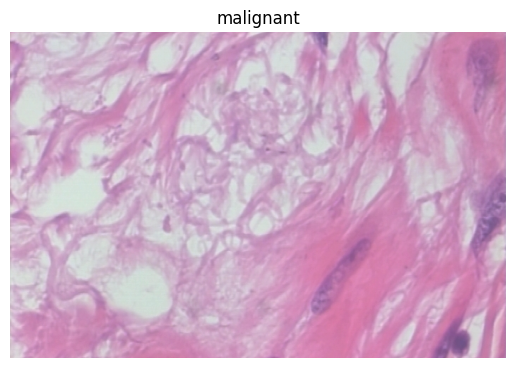

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="BreaKHis/train/",
                        target_class="malignant")

In [ ]:
train_dir = "/content/BreaKHis/train/"
test_dir = "/content/BreaKHis/test/"

In [ ]:
import os
import shutil
import random

# Set paths
base_dir = 'BreaKHis'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Create validation directories if they don't exist
os.makedirs(os.path.join(val_dir, 'benign'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'malignant'), exist_ok=True)

In [ ]:
# Function to split dataset
def split_data(source, destination, split_ratio=0.20):
    for class_name in ['benign', 'malignant']:
        class_path = os.path.join(source, class_name)
        images = os.listdir(class_path)
        random.shuffle(images)

        # Calculate number of images to move to validation set
        split_point = int(len(images) * split_ratio)

        # Move images to validation set
        for img in images[:split_point]:
            shutil.move(os.path.join(class_path, img),
                        os.path.join(destination, class_name, img))

In [ ]:
# Split the training data into training and validation sets
split_data(train_dir, val_dir)

In [ ]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("BreaKHis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'BreaKHis'.
There are 2 directories and 0 images in 'BreaKHis/test'.
There are 0 directories and 369 images in 'BreaKHis/test/malignant'.
There are 0 directories and 176 images in 'BreaKHis/test/benign'.
There are 2 directories and 0 images in 'BreaKHis/train'.
There are 0 directories and 622 images in 'BreaKHis/train/malignant'.
There are 0 directories and 297 images in 'BreaKHis/train/benign'.
There are 2 directories and 0 images in 'BreaKHis/validation'.
There are 0 directories and 155 images in 'BreaKHis/validation/malignant'.
There are 0 directories and 74 images in 'BreaKHis/validation/benign'.


In [ ]:
train_dir = "/content/BreaKHis/train/"
test_dir = "/content/BreaKHis/test/"
val_dir = "/content/BreaKHis/validation/"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

In [ ]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="binary", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="binary")
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="binary")

Found 919 files belonging to 2 classes.
Found 545 files belonging to 2 classes.
Found 229 files belonging to 2 classes.


In [ ]:
# Normalization function for float32 data, only normalizing the image
def normalize_img(image, label):
    """Normalizes only the image data that is already in float32 format."""
    return image / 255., label

In [ ]:
# Apply normalization to the datasets
normalized_train_data = train_data.map(normalize_img)
normalized_test_data = test_data.map(normalize_img)
normalized_val_data = val_data.map(normalize_img)

In [ ]:
# Configure the datasets for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
normalized_train_data = normalized_train_data.cache().prefetch(buffer_size=AUTOTUNE)
normalized_test_data = normalized_test_data.cache().prefetch(buffer_size=AUTOTUNE)
normalized_val_data = normalized_val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model

In [ ]:
# Input layer
input_layer = layers.Input(shape=(224, 224, 3), name="input")

# Data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name="data_augmentation")(input_layer)

# First branch
x1 = layers.Conv2D(32, (3, 3), padding="same", name="conv1")(data_augmentation)
x1 = layers.BatchNormalization(name="batchnorm1")(x1)
x1 = layers.LeakyReLU(alpha=0.2, name="leaky1")(x1)
x1 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool1")(x1)

# Second branch
x2 = layers.Conv2D(64, (5, 5), padding="same", name="conv2")(x1)
x2 = layers.GroupNormalization(groups=8, name="groupnorm2")(x2)
x2 = layers.ELU(name="elu2")(x2)
x2 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool2")(x2)

# Third branch
x3 = layers.Conv2D(32, (3, 3), padding="same", name="conv_1")(x1)
x3 = layers.BatchNormalization(name="batchnorm3")(x3)
x3 = layers.LeakyReLU(alpha=0.1, name="leaky3")(x3)
x3 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool3")(x3)

# Fourth branch
x4 = layers.Conv2D(32, (3, 3), padding="same", name="conv_4")(x1)
x4 = layers.GroupNormalization(groups=4, name="groupnorm4")(x4)
x4 = layers.ELU(name="elu4")(x4)
x4 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool4")(x4)

# Depth concatenation of branches
concat1 = layers.Concatenate(name="depthcat")([x2, x3, x4])
concat1 = layers.BatchNormalization(name="batchnorm2")(concat1)
concat1 = layers.LeakyReLU(alpha=0.1, name="leaky2")(concat1)
concat1 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool2_1")(concat1)

# Continue with the next layers
x5 = layers.Conv2D(128, (3, 3), padding="same", name="conv3")(concat1)

# Final output layers
avg_pool = layers.GlobalAveragePooling2D(name="avg1")(x5)
output_layer = layers.Dense(1, activation='sigmoid', name="sigmoid")(avg_pool)

# Define the model
model_4 = Model(inputs=input_layer, outputs=output_layer)

# Unfreeze all layers to allow training
for layer in model_4.layers:
    layer.trainable = True

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Display the model summary
model_4.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation         │ (None, None, None, 3)  │              0 │ input[0][0]            │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, None, None, 32) │            896 │ data_augmentation[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batchnorm1                │ (None, None, None, 32) │            128 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky1 (LeakyReLU)        │ (None, None, None, 32) │              0 │ batchnorm1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 32) │              0 │ leaky1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2 (Conv2D)            │ (None, None, None, 64) │         51,264 │ pool1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (Conv2D)           │ (None, None, None, 32) │          9,248 │ pool1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_4 (Conv2D)           │ (None, None, None, 32) │          9,248 │ pool1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ groupnorm2                │ (None, None, None, 64) │            128 │ conv2[0][0]            │
│ (GroupNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batchnorm3                │ (None, None, None, 32) │            128 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ groupnorm4                │ (None, None, None, 32) │             64 │ conv_4[0][0]           │
│ (GroupNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ elu2 (ELU)                │ (None, None, None, 64) │              0 │ groupnorm2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky3 (LeakyReLU)        │ (None, None, None, 32) │              0 │ batchnorm3[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ elu4 (ELU)                │ (None, None, None, 32) │              0 │ groupnorm4[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool2 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ elu2[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool3 (MaxPooling2D)      │ (None, None, None, 32) │              0 │ leaky3[0][0]           │
├──────────────────────

 Total params: 219,329 (856.75 KB)

 Trainable params: 218,945 (855.25 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Training
history = model_4.fit(
    normalized_train_data,
    epochs=300,
    validation_data=normalized_val_data
)

Epoch 1/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6719 - loss: 1.1630 - val_accuracy: 0.6769 - val_loss: 2.0300
Epoch 2/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8325 - loss: 0.4289 - val_accuracy: 0.6769 - val_loss: 1.6557
Epoch 3/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8545 - loss: 0.3617 - val_accuracy: 0.6769 - val_loss: 1.7208
Epoch 4/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8514 - loss: 0.3541 - val_accuracy: 0.6769 - val_loss: 1.9434
Epoch 5/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8560 - loss: 0.3325 - val_accuracy: 0.6769 - val_loss: 1.8735
Epoch 6/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8786 - loss: 0.3067 - val_accuracy: 0.6769 - val_loss: 1.5745
Epoch 7/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8777 - loss: 0.3087 - val_accuracy: 0.6769 - val_loss: 1.1719
Epoch 8/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8831 - loss: 0.2903 - val_accuracy: 0.6769 - v

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

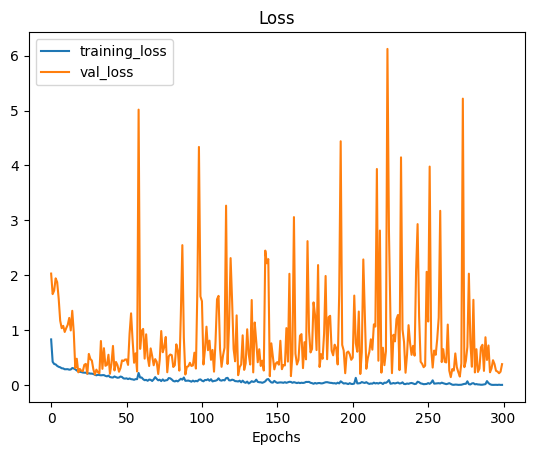

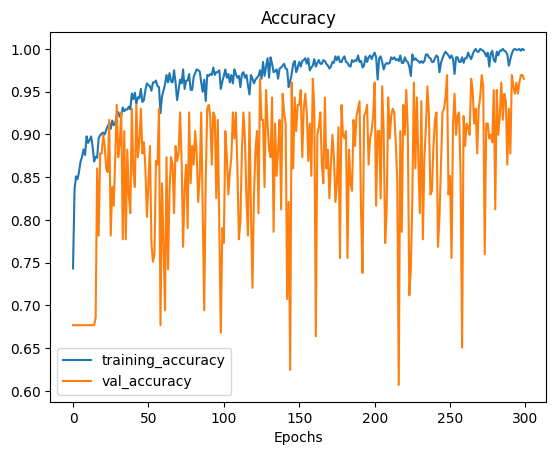

In [ ]:
plot_loss_curves(history)

In [ ]:
model_4.evaluate(normalized_test_data)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 394ms/step - accuracy: 0.9644 - loss: 0.2611


[0.3335045874118805, 0.9559633135795593]

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("BreaKHis/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['benign' 'malignant']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


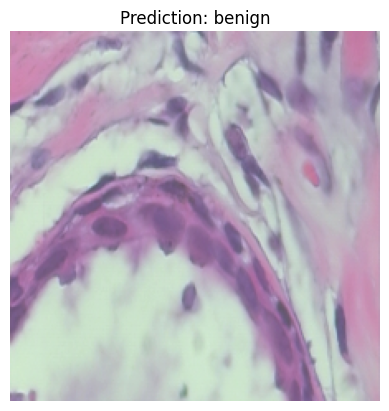

In [ ]:
# Test our model on a custom image
pred_and_plot(model_4, "benign.png", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


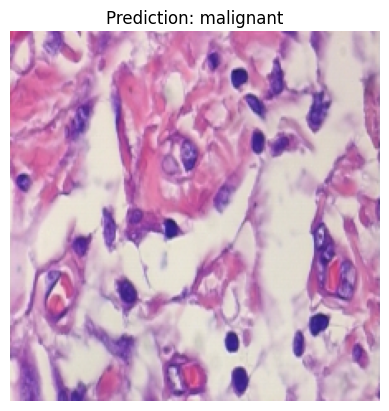

In [ ]:
# Test our model on a custom image
pred_and_plot(model_4, "malignant.png", class_names)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix_and_roc(model, test_data, class_labels=['Benign', 'Malignant']):
    """
    Generates and plots a confusion matrix and ROC curve for the given model and test data.

    Parameters:
    - model: The trained Keras model used for predictions.
    - test_data: A tf.data.Dataset object containing the test images and labels.
    - class_labels: List of class labels for plotting (default is ['Benign', 'Malignant']).
    """

    # Extract true labels from the test dataset
    y_true = []
    for _, labels in test_data:
        y_true.extend(labels.numpy())  # Convert labels to numpy and extend the list
    y_true = np.array(y_true)  # Convert the list to a numpy array

    # Make predictions using the model
    y_pred_probs = model.predict(test_data)  # Get predicted probabilities
    y_pred = (y_pred_probs > 0.5).astype(float)  # Convert probabilities to binary predictions

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

    # Calculate AUC (Area Under Curve)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
plot_confusion_matrix_and_roc(model_4, normalized_test_data)

NameError: name 'plot_confusion_matrix' is not defined